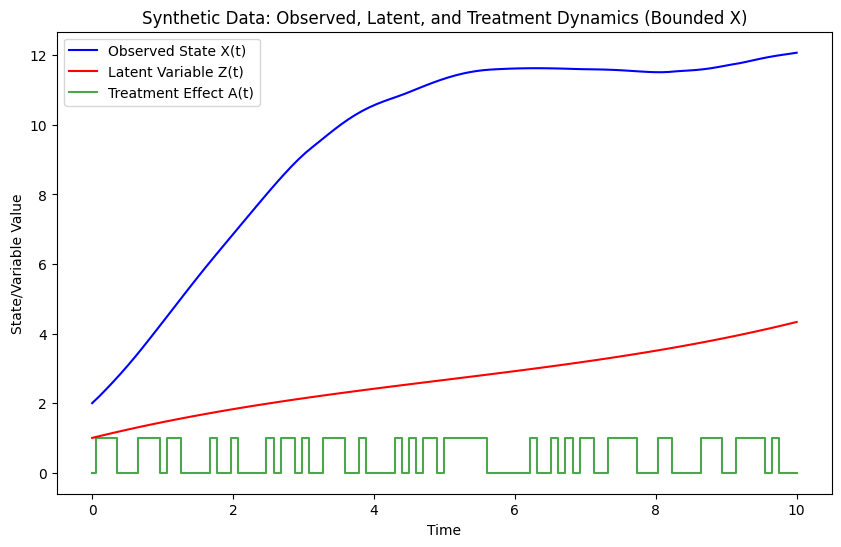

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.linear_model import Lasso
from scipy.optimize import minimize

# Time grid
t_span = np.linspace(0, 10, 100)

# Polynomial latent dynamics: dZ/dt = Q(Z, t; gamma)
def latent_ode(t, Z, gamma):
    """Latent ODE governed by a polynomial function."""
    r = len(gamma) - 1
    Q = sum(gamma[k] * t**k for k in range(r + 1))
    return Q

# Bernoulli treatment effect generator
def generate_treatment(t_span, probability=0.5):
    """Generate a Bernoulli treatment effect over time."""
    np.random.seed(42)  # For reproducibility
    return np.random.binomial(1, probability, size=len(t_span))

# Combined system of ODEs: dZ/dt and dX/dt
def combined_ode(t, Y, gamma, beta, U, A_t):
    """Combined ODE system for latent and observed dynamics."""
    Z, X = Y  # Split the state vector into Z and X
    U_t = np.sin(t)  # Direct computation of U(t)

    # Latent ODE
    dZ_dt = latent_ode(t, Z, gamma)

    # Population ODE with limiting growth (e.g., logistic-like or damping term)
    dX_dt = beta[0] * X * (1 - X / 10) + beta[1] * Z + beta[2] * U_t + beta[3] * A_t

    return [dZ_dt, dX_dt]

# Generate synthetic data for latent variables and observed states
def generate_synthetic_data():
    """Generate synthetic data for latent and observed dynamics."""
    # Parameters
    gamma = [0.5, -0.1, 0.01]  # Polynomial coefficients for latent dynamics
    beta = [0.8, 0.5, -0.3, 0.2]  # Population-level coefficients for F

    # Initial values
    Z0 = 1.0
    X0 = 2.0
    Y0 = [Z0, X0]  # Combined initial values for Z and X

    # Generate treatment effect A(t) as a Bernoulli process
    A = generate_treatment(t_span)

    # Solve the combined ODE system
    sol = solve_ivp(
        lambda t, Y: combined_ode(t, Y, gamma, beta, None, np.interp(t, t_span, A)),
        [t_span[0], t_span[-1]],
        Y0,
        t_eval=t_span,
    )

    Z, X = sol.y  # Extract Z and X from the solution
    return t_span, X, Z, A, gamma, beta

# Generate data
t_span, X, Z, A, gamma, beta = generate_synthetic_data()

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.plot(t_span, X, label="Observed State X(t)", color="blue")
plt.plot(t_span, Z, label="Latent Variable Z(t)", color="red")
plt.step(t_span, A, label="Treatment Effect A(t)", color="green", where="mid", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("State/Variable Value")
plt.title("Synthetic Data: Observed, Latent, and Treatment Dynamics (Bounded X)")
plt.legend()
plt.show()


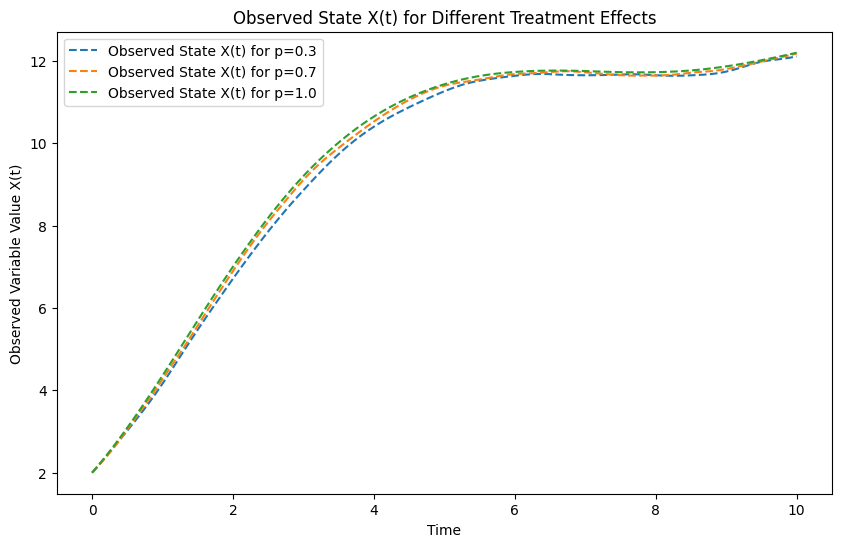

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Time grid
t_span = np.linspace(0, 10, 100)

# Latent ODE function remains the same
def latent_ode(t, Z, gamma):
    r = len(gamma) - 1
    Q = sum(gamma[k] * t**k for k in range(r + 1))
    return Q

# Generate treatment effects with different probabilities for different groups
def generate_treatment(t_span, probability=[0.5, 0.7]):
    np.random.seed(42)  # For reproducibility
    treatment_effects = []
    for prob in probability:
        treatment_effects.append(np.random.binomial(1, prob, size=len(t_span)))
    return treatment_effects

# Updated combined ODE system remains the same
def combined_ode(t, Y, gamma, beta, U, A_t):
    Z, X = Y
    U_t = np.sin(t)  # External input
    dZ_dt = latent_ode(t, Z, gamma)
    dX_dt = beta[0] * X * (1 - X / 10) + beta[1] * Z + beta[2] * U_t + beta[3] * A_t
    return [dZ_dt, dX_dt]

# Generate synthetic data with different treatment effects
def generate_synthetic_data(probabilities):
    gamma = [0.5, -0.1, 0.01]  # Same polynomial coefficients
    beta = [0.8, 0.5, -0.3, 0.2]  # Same population-level coefficients
    Z0 = 1.0
    X0 = 2.0
    Y0 = [Z0, X0]
    
    # Store results for each treatment group
    all_X_data = []
    
    # Iterate over different treatment probabilities
    for prob in probabilities:
        A = generate_treatment(t_span, probability=[prob])[0]
        sol = solve_ivp(
            lambda t, Y: combined_ode(t, Y, gamma, beta, None, np.interp(t, t_span, A)),
            [t_span[0], t_span[-1]],
            Y0,
            t_eval=t_span,
        )
        all_X_data.append(sol.y[1])  # Store observed state X
    
    return t_span, all_X_data, probabilities

# Generate data with different treatment probabilities
probabilities = [0.3, 0.7, 1.0]
t_span, all_X_data, probabilities = generate_synthetic_data(probabilities)

# Plot the synthetic data
plt.figure(figsize=(10, 6))
for idx, X in enumerate(all_X_data):
    plt.plot(t_span, X, label=f"Observed State X(t) for p={probabilities[idx]}", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Observed Variable Value X(t)")
plt.title("Observed State X(t) for Different Treatment Effects")
plt.legend()
plt.show()


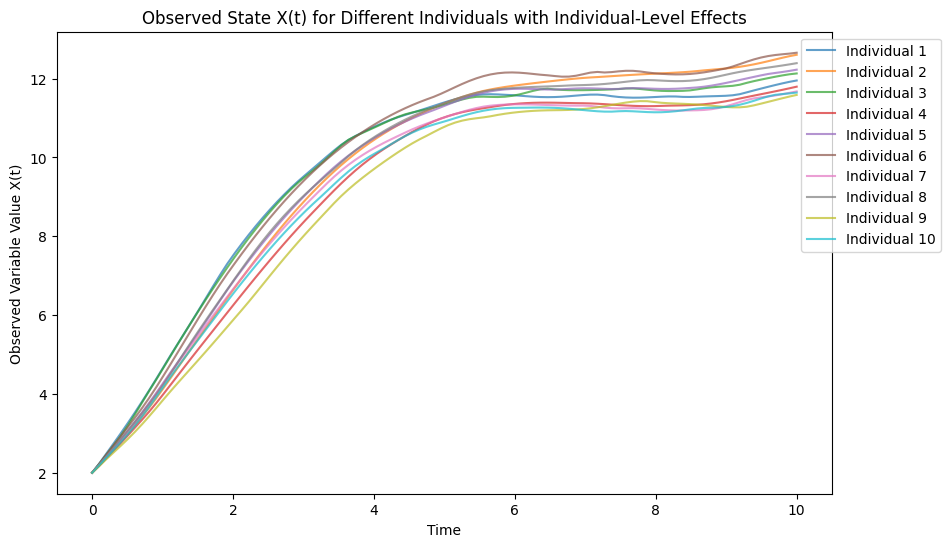

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Time grid
t_span = np.linspace(0, 10, 100)

# Latent ODE function remains the same
def latent_ode(t, Z, gamma):
    r = len(gamma) - 1
    Q = sum(gamma[k] * t**k for k in range(r + 1))
    return Q

# Generate treatment effects with different probabilities for different groups
def generate_treatment(t_span, probabilities):
    np.random.seed(42)  # For reproducibility
    treatment_effects = []
    for prob in probabilities:
        treatment_effects.append(np.random.binomial(1, prob, size=len(t_span)))
    return treatment_effects

# Updated combined ODE system for individual-level dynamics
def combined_ode(t, Y, gamma, beta_ind, U, A_t):
    Z, X = Y
    U_t = np.sin(t)  # External input
    dZ_dt = latent_ode(t, Z, gamma)
    dX_dt = beta_ind[0] * X * (1 - X / 10) + beta_ind[1] * Z + beta_ind[2] * U_t + beta_ind[3] * A_t
    return [dZ_dt, dX_dt]

# Function to generate individual-specific beta coefficients
def generate_individual_betas(population_beta, n_individuals):
    """Generate individual-specific coefficients based on population-level coefficients."""
    variability = np.random.normal(0, 0.1, (n_individuals, len(population_beta)))
    return population_beta + variability

# Generate synthetic data with individual treatment effects
def generate_synthetic_data(probabilities, n_individuals=10):
    gamma = [0.5, -0.1, 0.01]  # Same polynomial coefficients
    population_beta = [0.8, 0.5, -0.3, 0.2]  # Population-level coefficients
    individual_betas = generate_individual_betas(np.array(population_beta), n_individuals)  # Individual betas
    
    Z0 = 1.0
    X0 = 2.0
    Y0 = [Z0, X0]
    
    A = generate_treatment(t_span, probabilities)[0]  # Generate treatment effects
    
    # Store results for each individual
    all_X_data = np.zeros((n_individuals, len(t_span)))
    
    # Iterate over individuals
    for i in range(n_individuals):
        sol = solve_ivp(
            lambda t, Y: combined_ode(t, Y, gamma, individual_betas[i], None, np.interp(t, t_span, A)),
            [t_span[0], t_span[-1]],
            Y0,
            t_eval=t_span,
        )
        all_X_data[i] = sol.y[1]  # Store observed state X for individual i
    
    return t_span, all_X_data, individual_betas

# Generate data with individualized beta coefficients
probabilities = [0.3, 0.7]
n_individuals = 10
t_span, all_X_data, true_individual_betas = generate_synthetic_data(probabilities, n_individuals)

# Plot the synthetic data
plt.figure(figsize=(10, 6))
for i in range(n_individuals):
    plt.plot(t_span, all_X_data[i], label=f"Individual {i+1}", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Observed Variable Value X(t)")
plt.title("Observed State X(t) for Different Individuals with Individual-Level Effects")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

## Fit the VL-INSITE Model

In [70]:
# Fit the polynomial latent dynamics
def fit_latent_dynamics(t, Z, degree):
    """Fit polynomial coefficients for latent dynamics."""
    # Construct the design matrix for the polynomial
    T = np.vstack([t**k for k in range(degree + 1)]).T
    # Solve the least squares problem to find gamma
    gamma_est, _, _,    _ = np.linalg.lstsq(T, np.gradient(Z, t), rcond=None)
    return gamma_est

# Build the feature library for SINDy
def build_feature_library(X, Z, A):
    """Construct a feature library for SINDy."""
    return np.vstack([X, Z, A, X*Z, X**2, Z**2, A**2]).T


# Fit the sparse regression model for F
def fit_population_dynamics(t, dX_dt, feature_library):
    """Fit sparse regression model for F using LASSO."""
    lasso = Lasso(alpha=0.01, fit_intercept=False)
    lasso.fit(feature_library, dX_dt)
    return lasso.coef_

# To calculate individualized ground truth dX/dt
def calculate_individual_dX_dt(X_i, Z_i, A_i, beta, t):
    """Calculate dX/dt based on true dynamics for each individual."""
    return beta[0] * X_i * (1 - X_i / 10) + beta[1] * Z_i + beta[2] * np.sin(t) + beta[3] * A_i

In [71]:
# Compute dX/dt using finite differences
dX_dt = np.gradient(X, t_span)

# Build the feature library
feature_library = build_feature_library(X, Z, A)

# Fit the population-level ODE
beta_est = fit_population_dynamics(t_span, dX_dt, feature_library)

# Compare true and estimated beta
print(f"True beta: {beta}")
print(f"Estimated beta: {beta_est}")

# Fine-tune beta for individual-specific dynamics 
def fine_tune_individual_dynamics(X_i, dX_dt_i, feature_library, beta_est, lambda_reg=0.1):
    """Fine-tune beta for individual-specific dynamics."""
    def loss_function(beta_i):
        # Regularized MSE loss
        mse_loss = np.mean((dX_dt_i - feature_library @ beta_i)**2)
        reg_loss = lambda_reg * np.sum((beta_est - beta_i)**2)
        return mse_loss + reg_loss

    # Optimize the loss
    res = minimize(loss_function, beta_est, method="L-BFGS-B")
    return res.x

# Fine-tune beta for each individual
n_individuals = 10
individual_betas = []
for i in range(n_individuals):
    # Extract individual data (you must have individual data structure)
    X_i = all_X_data[i]  # All X data from earlier snippet
    dX_dt_i = np.gradient(X_i, t_span)
    feature_library_i = build_feature_library(X_i, Z, A)
    beta_individual = fine_tune_individual_dynamics(X_i, dX_dt_i, feature_library_i, beta_est)
    individual_betas.append(beta_individual)

# Print results for each individual
print('\n')
for i in range(n_individuals):
    print(f"Individual {i+1} beta: {individual_betas[i]}")
    print(f"True individual {i+1} beta: {true_individual_betas[i]}")
    

True beta: [0.8, 0.5, -0.3, 0.2]
Estimated beta: [ 0.75154777  0.5135291   0.         -0.34191602 -0.02335873  0.55422853
  0.        ]


Individual 1 beta: [ 0.82750526  0.58262863  0.03469712 -0.38311629 -0.0266288   0.61044767
  0.03469713]
True individual 1 beta: [ 0.98657745  0.54738329 -0.41913035  0.26565536]
Individual 2 beta: [ 0.68304798  0.49762387  0.00718757 -0.33888103 -0.01815072  0.58394193
  0.00718757]
True individual 2 beta: [ 0.70253183  0.57870846 -0.18414044  0.11793177]
Individual 3 beta: [ 0.80714594  0.58262688  0.0291515  -0.34506879 -0.0309353   0.56864961
  0.0291515 ]
True individual 3 beta: [ 0.89633761  0.54127809 -0.21779398  0.3896793 ]
Individual 4 beta: [ 0.68534317  0.46139962  0.00179343 -0.41983528 -0.00434515  0.64969215
  0.00179343]
True individual 4 beta: [ 0.77546119  0.42462638 -0.38895144  0.11841897]
Individual 5 beta: [ 0.72311538  0.51737578  0.02545138 -0.37415991 -0.01683389  0.61416405
  0.02545138]
True individual 5 beta: [ 0.79228983

/home/users/bruno.cesar/miniconda3/envs/causal/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.036e+00, tolerance: 2.050e-02
  model = cd_fast.enet_coordinate_descent(


New treatment effects: [0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0]


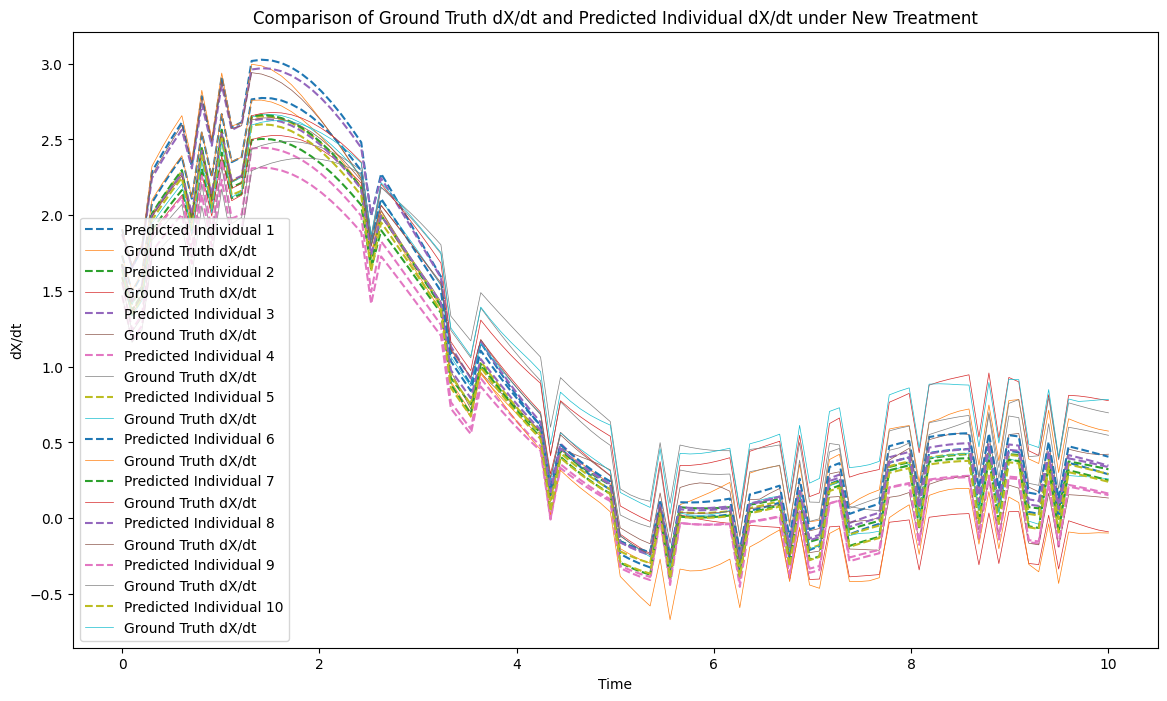

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Change treatment: Define new treatment effect
new_probabilities = [0.3, 0.6]  # Change probability for treatment effects
treatment_effects = generate_treatment(t_span, probabilities=new_probabilities)[0]  # Change treatment
print(f"New treatment effects: {treatment_effects}")

# True dynamics calculation using known beta
def calculate_dX_dt(X, Z, A, beta, t):
    """Calculate dX/dt based on true dynamics."""
    return beta[0] * X * (1 - X / 10) + beta[1] * Z + beta[2] * np.sin(t) + beta[3] * A

# # Compute the ground truth dX/dt for the new treatment
dX_dt_ground_truth = calculate_dX_dt(X, Z, treatment_effects, beta, t_span)

# Compute individualized ground truth dX/dt for each individual
individual_dX_dt_ground_truth = []
for i in range(n_individuals):
    X_i = all_X_data[i]
    Z_i = Z  # Assuming the same latent variable for simplicity
    A_i = treatment_effects  # Using the changed treatment
    dX_dt_i = calculate_individual_dX_dt(X_i, Z_i, A_i, individual_betas[i], t_span)
    individual_dX_dt_ground_truth.append(dX_dt_i)


# Create a function to predict dX/dt using inferred individual parameters
def predict_dX_dt(X, Z, A, individual_betas, t):
    """Predict dX/dt for all individuals based on inferred coefficients."""
    dX_dt_predictions = []
    for beta_individual in individual_betas:
        dX_dt_i = beta_individual[0] * X * (1 - X / 10) + beta_individual[1] * Z + beta_individual[2] * np.sin(t) + beta_individual[3] * A
        dX_dt_predictions.append(dX_dt_i)
    return np.array(dX_dt_predictions)

# Predict dX/dt for all individuals using their inferred betas
dX_dt_predicted = predict_dX_dt(X, Z, treatment_effects, individual_betas, t_span)

# Plotting
plt.figure(figsize=(14, 8))

# Ground truth dX/dt vs. Individual predictions
for i in range(n_individuals):
    plt.plot(t_span, dX_dt_predicted[i], label=f"Predicted Individual {i+1}", alpha=1, linestyle='--')

    plt.plot(t_span, individual_dX_dt_ground_truth[i], label="Ground Truth dX/dt", linewidth=0.5)
plt.xlabel("Time")
plt.ylabel("dX/dt")
plt.title("Comparison of Ground Truth dX/dt and Predicted Individual dX/dt under New Treatment")
plt.legend()
plt.show()

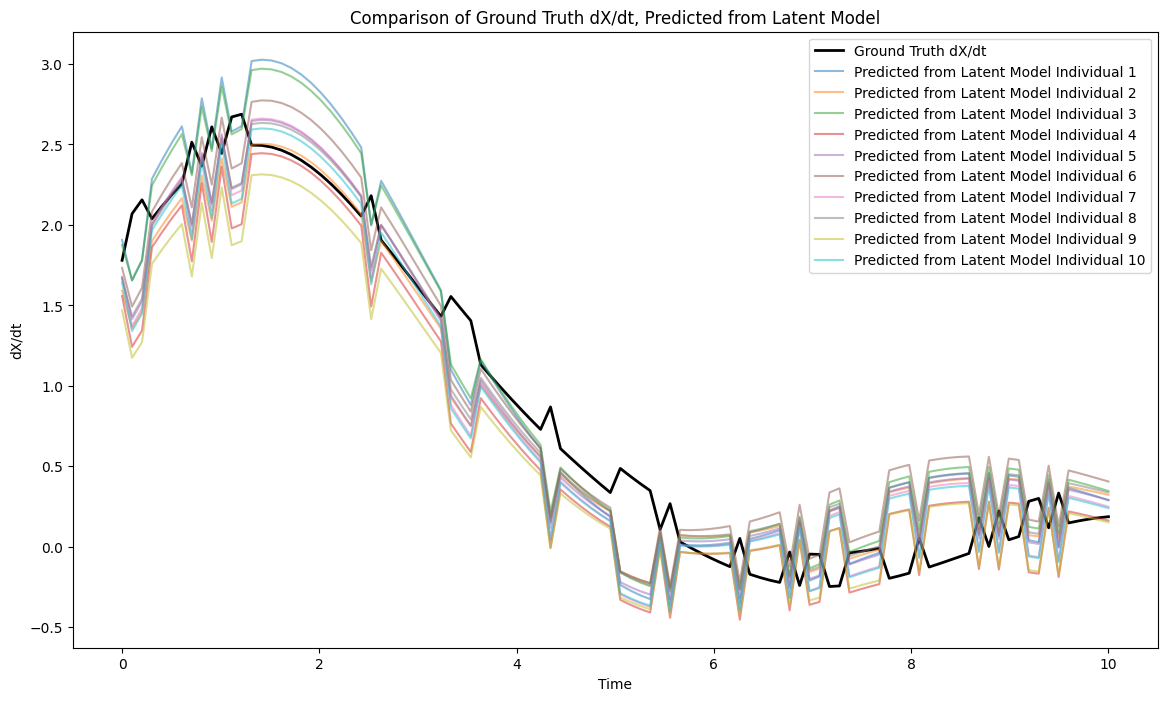

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from scipy.optimize import minimize

# Adjust existing function definitions here, including the ones for generating data...

# Build a feature library for the direct model (without latent variable)
def build_feature_library_direct(X, A):
    """Construct a feature library without considering latent variable Z."""
    return np.vstack([X, A, X*X, A*A]).T  # Adding interaction terms where needed

# Fit the sparse regression model for individual dynamics directly
def fit_individual_dynamics_direct(X_i, dX_dt_i, feature_library):
    """Fit Lasso regression for individual dynamics without latent dynamics."""
    lasso = Lasso(alpha=0.01, fit_intercept=False)
    lasso.fit(feature_library, dX_dt_i)
    return lasso.coef_

# Fit beta for each individual without latent variable
individual_betas_direct = []
for i in range(n_individuals):
    X_i = all_X_data[i]  # Individual observed data for each person
    dX_dt_i = np.gradient(X_i, t_span)  # Calculate dX/dt for that individual
    feature_library_direct = build_feature_library_direct(X_i, treatment_effects)  # Build feature library
    beta_individual_direct = fit_individual_dynamics_direct(X_i, dX_dt_i, feature_library_direct)  # Fit model
    individual_betas_direct.append(beta_individual_direct)

# Predict dX/dt for all individuals using inferred betas from the direct model
def predict_dX_dt_direct(X, A, individual_betas, t):
    """Predict dX/dt for all individuals using direct inferred coefficients."""
    dX_dt_predictions_direct = []
    for beta_individual in individual_betas:
        dX_dt_i = beta_individual[0] * X + beta_individual[1] * A + beta_individual[2] * X * X + beta_individual[3] * A * A
        dX_dt_predictions_direct.append(dX_dt_i)
    return np.array(dX_dt_predictions_direct)

# Predict dX/dt for all individuals using their inferred betas from the direct model
dX_dt_predicted_direct = predict_dX_dt_direct(X, treatment_effects, individual_betas_direct, t_span)

# Plotting both predictions for comparison
plt.figure(figsize=(14, 8))

# Ground truth dX/dt and predicted values from the latent model
plt.plot(t_span, dX_dt_ground_truth, label="Ground Truth dX/dt", color='black', linewidth=2)
for i in range(n_individuals):
    plt.plot(t_span, dX_dt_predicted[i], label=f"Predicted from Latent Model Individual {i+1}", alpha=0.5)

# # Predicted values from the direct model
# for i in range(n_individuals):
#     plt.plot(t_span, dX_dt_predicted_direct[i], linestyle='--', label=f"Predicted from Direct Model Individual {i+1}", alpha=0.5)

plt.xlabel("Time")
plt.ylabel("dX/dt")
plt.title("Comparison of Ground Truth dX/dt, Predicted from Latent Model")
plt.legend()
plt.show()

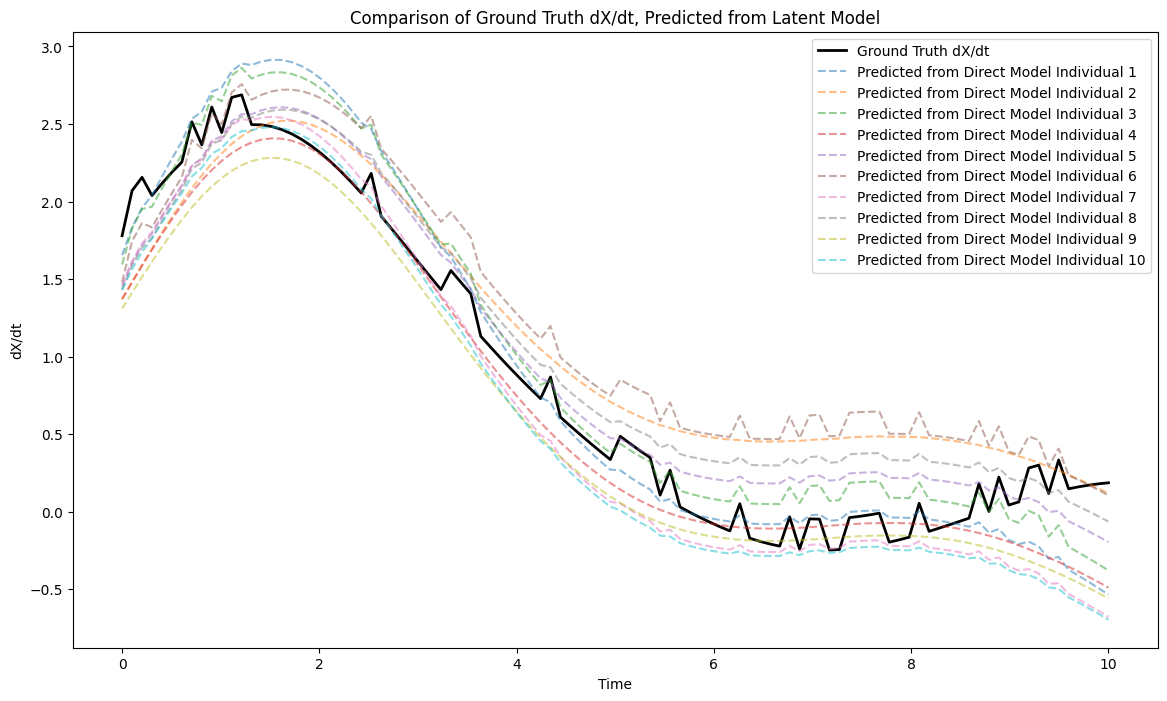

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from scipy.optimize import minimize

# Adjust existing function definitions here, including the ones for generating data...

# Build a feature library for the direct model (without latent variable)
def build_feature_library_direct(X, A):
    """Construct a feature library without considering latent variable Z."""
    return np.vstack([X, A, X*X, A*A]).T  # Adding interaction terms where needed

# Fit the sparse regression model for individual dynamics directly
def fit_individual_dynamics_direct(X_i, dX_dt_i, feature_library):
    """Fit Lasso regression for individual dynamics without latent dynamics."""
    lasso = Lasso(alpha=0.01, fit_intercept=False)
    lasso.fit(feature_library, dX_dt_i)
    return lasso.coef_

# Fit beta for each individual without latent variable
individual_betas_direct = []
for i in range(n_individuals):
    X_i = all_X_data[i]  # Individual observed data for each person
    dX_dt_i = np.gradient(X_i, t_span)  # Calculate dX/dt for that individual
    feature_library_direct = build_feature_library_direct(X_i, treatment_effects)  # Build feature library
    beta_individual_direct = fit_individual_dynamics_direct(X_i, dX_dt_i, feature_library_direct)  # Fit model
    individual_betas_direct.append(beta_individual_direct)

# Predict dX/dt for all individuals using inferred betas from the direct model
def predict_dX_dt_direct(X, A, individual_betas, t):
    """Predict dX/dt for all individuals using direct inferred coefficients."""
    dX_dt_predictions_direct = []
    for beta_individual in individual_betas:
        dX_dt_i = beta_individual[0] * X + beta_individual[1] * A + beta_individual[2] * X * X + beta_individual[3] * A * A
        dX_dt_predictions_direct.append(dX_dt_i)
    return np.array(dX_dt_predictions_direct)

# Predict dX/dt for all individuals using their inferred betas from the direct model
dX_dt_predicted_direct = predict_dX_dt_direct(X, treatment_effects, individual_betas_direct, t_span)

# Plotting both predictions for comparison
plt.figure(figsize=(14, 8))

# Ground truth dX/dt and predicted values from the latent model
plt.plot(t_span, dX_dt_ground_truth, label="Ground Truth dX/dt", color='black', linewidth=2)
# for i in range(n_individuals):
#     plt.plot(t_span, dX_dt_predicted[i], label=f"Predicted from Latent Model Individual {i+1}", alpha=0.5)

# Predicted values from the direct model
for i in range(n_individuals):
    plt.plot(t_span, dX_dt_predicted_direct[i], linestyle='--', label=f"Predicted from Direct Model Individual {i+1}", alpha=0.5)

plt.xlabel("Time")
plt.ylabel("dX/dt")
plt.title("Comparison of Ground Truth dX/dt, Predicted from Latent Model")
plt.legend()
plt.show()

In [75]:
# To calculate individualized ground truth dX/dt
def calculate_individual_dX_dt(X_i, Z_i, A_i, beta, t):
    """Calculate dX/dt based on true dynamics for each individual."""
    return beta[0] * X_i * (1 - X_i / 10) + beta[1] * Z_i + beta[2] * np.sin(t) + beta[3] * A_i

# Compute ground truth dX/dt for all individuals using the true beta values
individual_dX_dt_ground_truth = []
for i in range(n_individuals):
    X_i = all_X_data[i]
    Z_i = Z  # assuming the same latent variable for simplicity
    A_i = treatment_effects  # Using the modified treatment
    dX_dt_i = calculate_individual_dX_dt(X_i, Z_i, A_i, beta, t_span)
    individual_dX_dt_ground_truth.append(dX_dt_i)

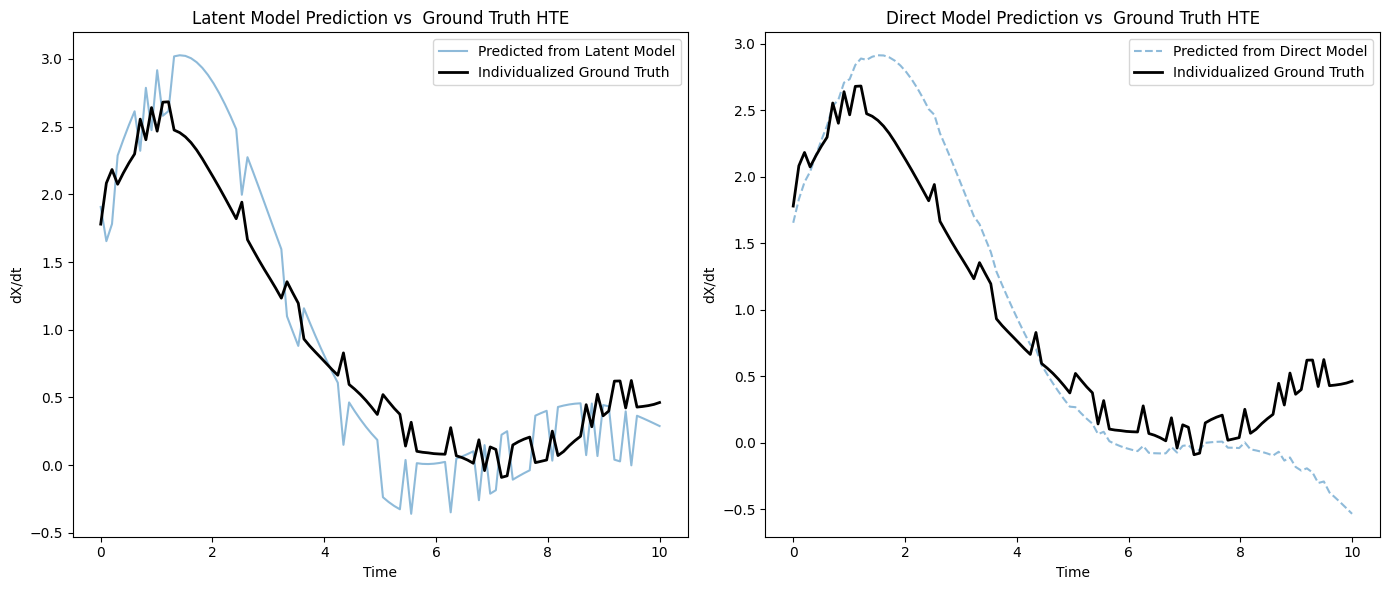

In [76]:
# Predict dX/dt for all individuals using their inferred betas from the latent model
dX_dt_predicted = predict_dX_dt(X, Z, treatment_effects, individual_betas, t_span)

# Plotting the latent model with individualized ground truth
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # First subplot
plt.plot(t_span, dX_dt_predicted[0], label='Predicted from Latent Model', alpha=0.5)
plt.plot(t_span, individual_dX_dt_ground_truth[0], label='Individualized Ground Truth', color='black', linewidth=2)
plt.title("Latent Model Prediction vs  Ground Truth HTE")
plt.xlabel("Time")
plt.ylabel("dX/dt")
plt.legend()

# Predict dX/dt for all individuals using inferred betas from the direct model
dX_dt_predicted_direct = predict_dX_dt_direct(X, treatment_effects, individual_betas_direct, t_span)

# Plotting the direct model with individualized ground truth
plt.subplot(1, 2, 2)  # Second subplot
plt.plot(t_span, dX_dt_predicted_direct[0], linestyle='--', label='Predicted from Direct Model', alpha=0.5)
plt.plot(t_span, individual_dX_dt_ground_truth[0], label='Individualized Ground Truth', color='black', linewidth=2)
plt.title("Direct Model Prediction vs  Ground Truth HTE")
plt.xlabel("Time")
plt.ylabel("dX/dt")
plt.legend()

plt.tight_layout()
plt.show()

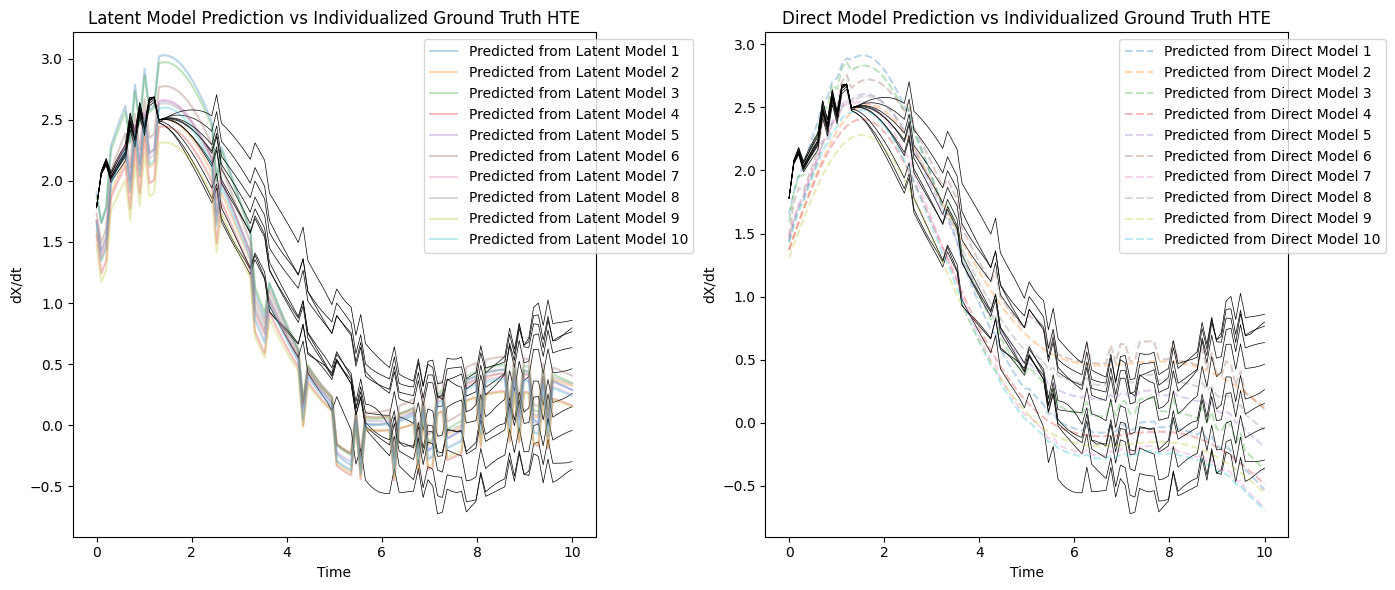

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from scipy.optimize import minimize

# Assuming you already have the previous functions defined (e.g., data generation, fitting functions)...

# Compute individualized ground truth dX/dt for each individual
individual_dX_dt_ground_truth = []
for i in range(n_individuals):
    X_i = all_X_data[i]
    Z_i = Z  # Assuming the same latent variable for simplicity
    A_i = treatment_effects  # Using the changed treatment
    dX_dt_i = calculate_individual_dX_dt(X_i, Z_i, A_i, beta, t_span)
    individual_dX_dt_ground_truth.append(dX_dt_i)

# Predict dX/dt for all individuals using their inferred betas from the latent model
dX_dt_predicted = predict_dX_dt(X, Z, treatment_effects, individual_betas, t_span)

# Predict dX/dt for all individuals using inferred betas from the direct model
dX_dt_predicted_direct = predict_dX_dt_direct(X, treatment_effects, individual_betas_direct, t_span)

# Plotting the latent model with individualized ground truth
plt.figure(figsize=(14, 6))

# 1. Latent Model Predictions vs Individualized Ground Truth
plt.subplot(1, 2, 1)  # First subplot
for i in range(n_individuals):
    plt.plot(t_span, dX_dt_predicted[i], label=f'Predicted from Latent Model {i+1}', alpha=0.3)
    plt.plot(t_span, individual_dX_dt_ground_truth[i], color='black', linewidth=0.5)  # Individual ground truth

plt.title("Latent Model Prediction vs Individualized Ground Truth HTE")
plt.xlabel("Time")
plt.ylabel("dX/dt")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# 2. Direct Model Predictions vs Individualized Ground Truth
plt.subplot(1, 2, 2)  # Second subplot
for i in range(n_individuals):
    plt.plot(t_span, dX_dt_predicted_direct[i], linestyle='--', label=f'Predicted from Direct Model {i+1}', alpha=0.3)
    plt.plot(t_span, individual_dX_dt_ground_truth[i], color='black', linewidth=0.5)  # Individual ground truth

plt.title("Direct Model Prediction vs Individualized Ground Truth HTE")
plt.xlabel("Time")
plt.ylabel("dX/dt")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

## Improved Latent Discovery

/home/users/bruno.cesar/miniconda3/envs/causal/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.221e+00, tolerance: 1.941e-02
  model = cd_fast.enet_coordinate_descent(


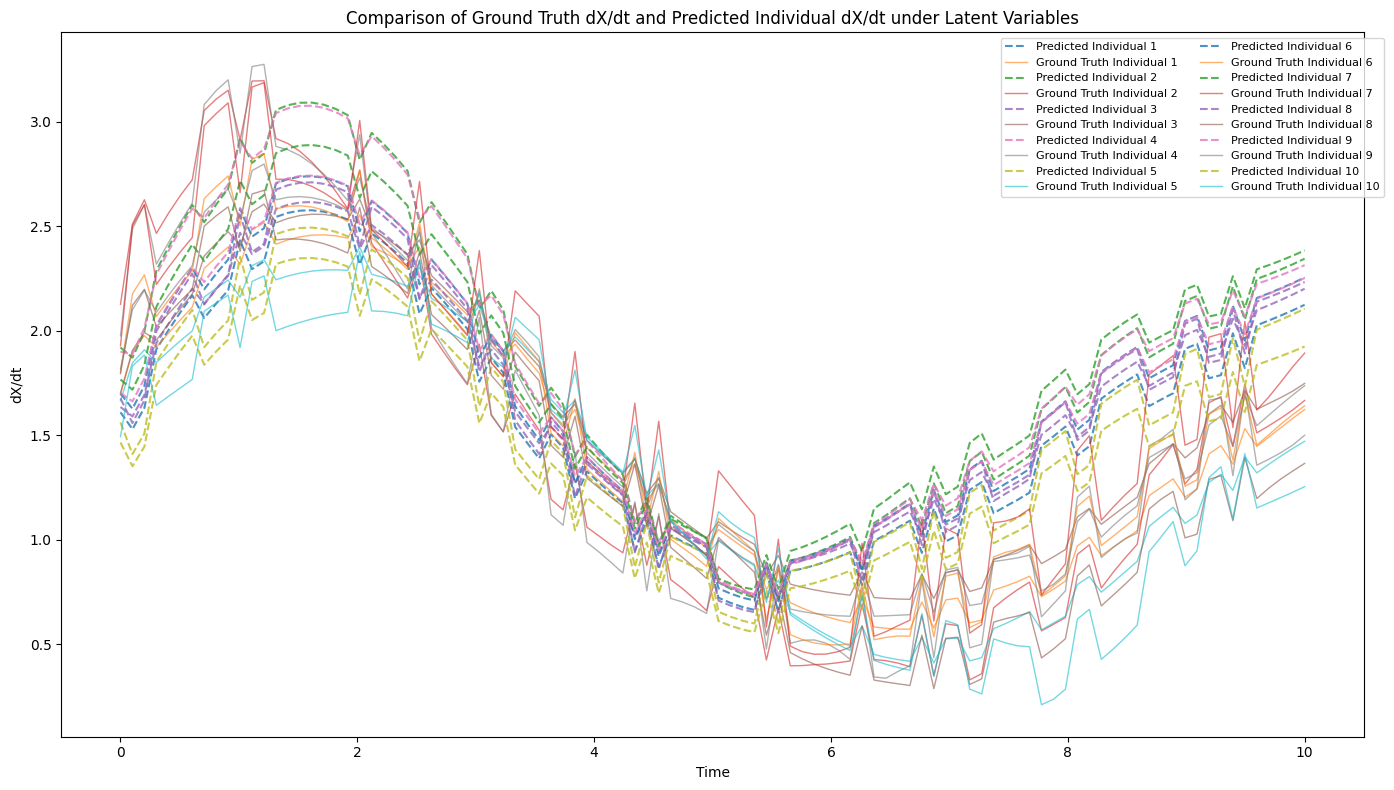

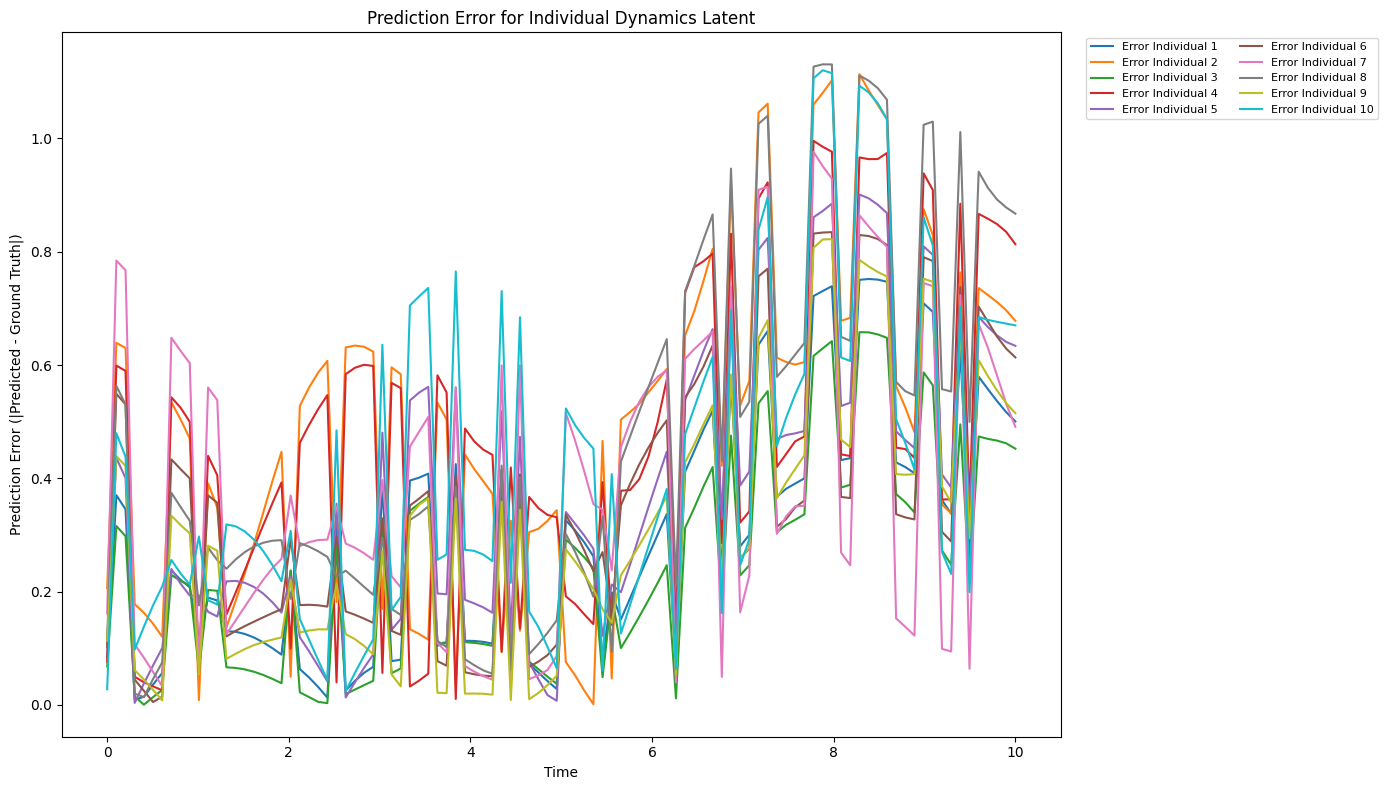

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.linear_model import Lasso
from scipy.optimize import minimize

# Time grid
t_span = np.linspace(0, 10, 100)

# Latent ODE function
def latent_ode(t, Z, gamma):
    r = len(gamma) - 1
    Q = sum(gamma[k] * t**k for k in range(r + 1))
    return Q

# Generate treatment effects with different probabilities for different groups
def generate_treatment(t_span, probabilities):
    np.random.seed(42)
    treatment_effects = []
    for prob in probabilities:
        treatment_effects.append(np.random.binomial(1, prob, size=len(t_span)))
    return treatment_effects

# Combined ODE system for individual-level dynamics
def combined_ode(t, Y, gamma, beta_ind, U, A_t):
    Z, X = Y
    U_t = np.sin(t)
    dZ_dt = latent_ode(t, Z, gamma)
    dX_dt = beta_ind[0] * X * (1 - X / 10) + beta_ind[1] * Z + beta_ind[2] * U_t + beta_ind[3] * A_t
    return [dZ_dt, dX_dt]

# Generate individual-specific beta coefficients
def generate_individual_betas(population_beta, n_individuals):
    variability = np.random.normal(0, 0.1, (n_individuals, len(population_beta)))
    return population_beta + variability

# Generate synthetic data
def generate_synthetic_data(probabilities, n_individuals=10):
    gamma = [0.5, -0.1, 0.01]  # Polynomial coefficients for Z dynamics
    population_beta = [0.8, 0.5, -0.3, 0.2]  # Population-level coefficients
    individual_betas = generate_individual_betas(np.array(population_beta), n_individuals)
    
    Z0 = 1.0
    X0 = 2.0
    Y0 = [Z0, X0]
    
    A = generate_treatment(t_span, probabilities)[0]
    
    all_X_data = np.zeros((n_individuals, len(t_span)))
    for i in range(n_individuals):
        sol = solve_ivp(
            lambda t, Y: combined_ode(t, Y, gamma, individual_betas[i], None, np.interp(t, t_span, A)),
            [t_span[0], t_span[-1]],
            Y0,
            t_eval=t_span,
        )
        all_X_data[i] = sol.y[1]
    
    return t_span, all_X_data, individual_betas

# Generate data
probabilities = [0.3, 0.7]
n_individuals = 10
t_span, all_X_data, true_individual_betas = generate_synthetic_data(probabilities, n_individuals)

# Prepare data for inference
X = np.mean(all_X_data, axis=0)  # Population-level observed data
A = generate_treatment(t_span, probabilities)[0]
dX_dt = np.gradient(X, t_span)

# Fit the sparse regression model for F
def build_feature_library(X, Z, A):
    return np.vstack([X, Z, A, X*Z, X**2, Z**2, A**2]).T

def fit_population_dynamics(t, dX_dt, feature_library):
    lasso = Lasso(alpha=0.01, fit_intercept=False)
    lasso.fit(feature_library, dX_dt)
    return lasso.coef_

# Infer latent variable Z(t) (population-level)
gamma = [0.5, -0.05, 0.01]  
Z0 = 1.0
Z = solve_ivp(lambda t, Z: latent_ode(t, Z, gamma), [t_span[0], t_span[-1]], [Z0], t_eval=t_span).y[0]

# Build feature library and fit population-level dynamics
feature_library = build_feature_library(X, Z, A)
beta_est = fit_population_dynamics(t_span, dX_dt, feature_library)

# Fine-tune beta for each individual
def fine_tune_individual_dynamics(X_i, dX_dt_i, feature_library, beta_est, lambda_reg=0.1):
    def loss_function(beta_i):
        mse_loss = np.mean((dX_dt_i - feature_library @ beta_i)**2)
        reg_loss = lambda_reg * np.sum((beta_est - beta_i)**2)
        return mse_loss + reg_loss

    res = minimize(loss_function, beta_est, method="L-BFGS-B")
    return res.x

individual_betas = []
for i in range(n_individuals):
    X_i = all_X_data[i]
    dX_dt_i = np.gradient(X_i, t_span)
    feature_library_i = build_feature_library(X_i, Z, A)
    beta_individual = fine_tune_individual_dynamics(X_i, dX_dt_i, feature_library_i, beta_est)
    individual_betas.append(beta_individual)

    
# Calculate the ground truth dX/dt for the new treatment
def calculate_dX_dt(X, Z, A, beta, t):
    """Calculate dX/dt based on true dynamics."""
    return beta[0] * X * (1 - X / 10) + beta[1] * Z + beta[2] * np.sin(t) + beta[3] * A

# Generate a new treatment effect with updated probabilities
new_probabilities = [0.4, 0.6]  # Changed probabilities for treatment
treatment_effects = generate_treatment(t_span, new_probabilities)[0]

# Ground truth dX/dt for the new treatment
dX_dt_ground_truth = calculate_dX_dt(X, Z, treatment_effects, beta_est, t_span)

# Compute individualized ground truth dX/dt
def calculate_individual_dX_dt(X_i, Z_i, A_i, beta_individual, t):
    """Calculate individual dX/dt based on true dynamics."""
    return beta_individual[0] * X_i * (1 - X_i / 10) + beta_individual[1] * Z_i + beta_individual[2] * np.sin(t) + beta_individual[3] * A_i

individual_dX_dt_ground_truth = []
for i in range(n_individuals):
    X_i = all_X_data[i]
    Z_i = Z
    A_i = treatment_effects
    dX_dt_i = calculate_individual_dX_dt(X_i, Z_i, A_i, true_individual_betas[i], t_span)
    individual_dX_dt_ground_truth.append(dX_dt_i)

# Create a function to predict dX/dt using inferred individual parameters
def predict_dX_dt(X, Z, A, individual_betas, t):
    """Predict dX/dt for all individuals based on inferred coefficients."""
    dX_dt_predictions = []
    for beta_individual in individual_betas:
        dX_dt_i = beta_individual[0] * X * (1 - X / 10) + beta_individual[1] * Z + beta_individual[2] * np.sin(t) + beta_individual[3] * A
        dX_dt_predictions.append(dX_dt_i)
    return np.array(dX_dt_predictions)

# Predict dX/dt for all individuals
dX_dt_predicted = predict_dX_dt(X, Z, treatment_effects, individual_betas, t_span)

# Plot the comparison of ground truth and predicted dX/dt
plt.figure(figsize=(14, 8))

for i in range(n_individuals):
    plt.plot(t_span, dX_dt_predicted[i], label=f"Predicted Individual {i+1}", linestyle="--", alpha=0.8)
    plt.plot(t_span, individual_dX_dt_ground_truth[i], label=f"Ground Truth Individual {i+1}", linewidth=1, alpha=0.6)

plt.xlabel("Time")
plt.ylabel("dX/dt")
plt.title("Comparison of Ground Truth dX/dt and Predicted Individual dX/dt under Latent Variables")
plt.legend( bbox_to_anchor=(1.02, 1), ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

# Calculate and plot the error (absolute difference)
plt.figure(figsize=(14, 8))

for i in range(n_individuals):
    error = np.abs(dX_dt_predicted[i] - individual_dX_dt_ground_truth[i])
    plt.plot(t_span, error, label=f"Error Individual {i+1}")

plt.xlabel("Time")
plt.ylabel("Prediction Error (|Predicted - Ground Truth|)")
plt.title("Prediction Error for Individual Dynamics Latent")
plt.legend(bbox_to_anchor=(1.02, 1), ncol=2, fontsize=8)
plt.tight_layout()
plt.show()



Individual 1 - MSE: 0.1761, Std: 0.6997
Individual 2 - MSE: 0.0893, Std: 0.7396
Individual 3 - MSE: 0.2727, Std: 0.7118
Individual 4 - MSE: 0.3819, Std: 0.7767
Individual 5 - MSE: 0.1885, Std: 0.6444
Individual 6 - MSE: 0.1663, Std: 0.7408
Individual 7 - MSE: 0.2966, Std: 0.6140
Individual 8 - MSE: 0.1424, Std: 0.6364
Individual 9 - MSE: 0.3113, Std: 0.8048
Individual 10 - MSE: 0.2416, Std: 0.6991


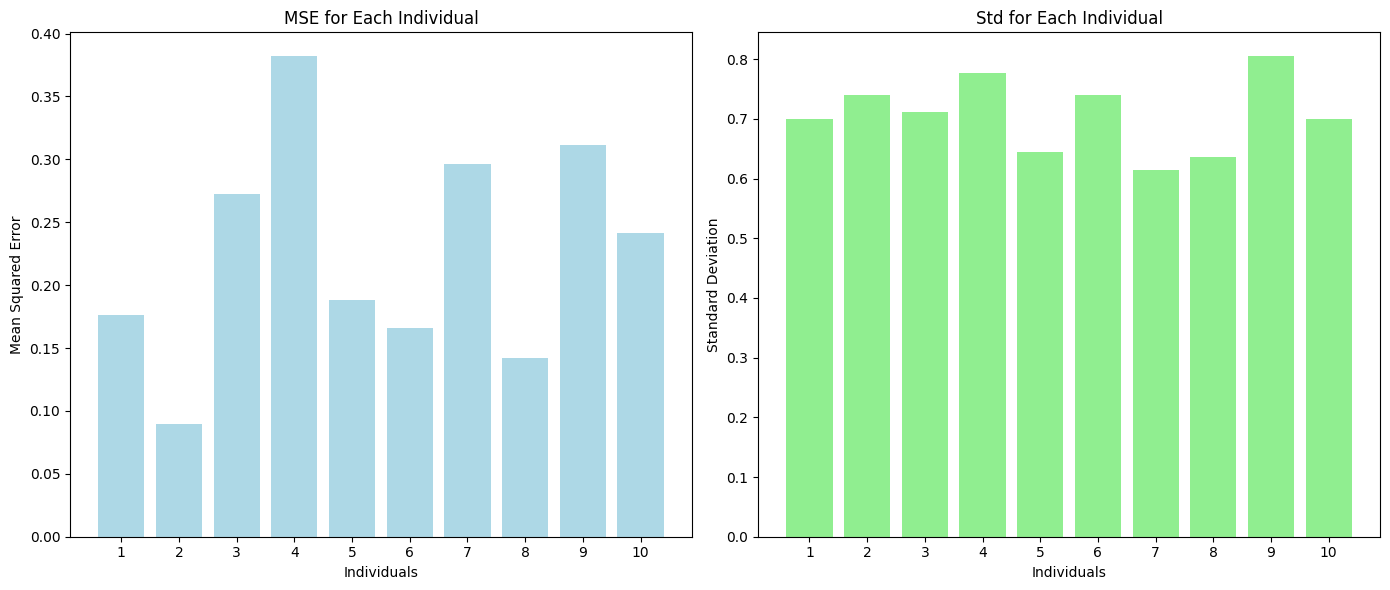

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Mean Squared Error
def calculate_mse(true_values, predicted_values):
    return np.mean((true_values - predicted_values) ** 2)

# Function to calculate Standard Deviation
def calculate_std(values):
    return np.std(values)

# Calculate metrics for each individual
mse_values = []
std_values = []

for i in range(n_individuals):
    mse = calculate_mse(individual_dX_dt_ground_truth[i], dX_dt_predicted[i])
    std = calculate_std(individual_dX_dt_ground_truth[i])  # Example usage of std
    mse_values.append(mse)
    std_values.append(std)

# Print the MSE and std for each individual
for i in range(n_individuals):
    print(f"Individual {i+1} - MSE: {mse_values[i]:.4f}, Std: {std_values[i]:.4f}")

# Optional: Visualize MSE and Std
plt.figure(figsize=(14, 6))

# Subplot for MSE
plt.subplot(1, 2, 1)
plt.bar(range(1, n_individuals + 1), mse_values, color='lightblue')
plt.xticks(range(1, n_individuals + 1))
plt.xlabel("Individuals")
plt.ylabel("Mean Squared Error")
plt.title("MSE for Each Individual")

# Subplot for Standard Deviation
plt.subplot(1, 2, 2)
plt.bar(range(1, n_individuals + 1), std_values, color='lightgreen')
plt.xticks(range(1, n_individuals + 1))
plt.xlabel("Individuals")
plt.ylabel("Standard Deviation")
plt.title("Std for Each Individual")

plt.tight_layout()
plt.show()


Population Level - MSE: 0.1883, Std: 0.6915


Text(0.5, 1.0, 'MSE for Each Individual')

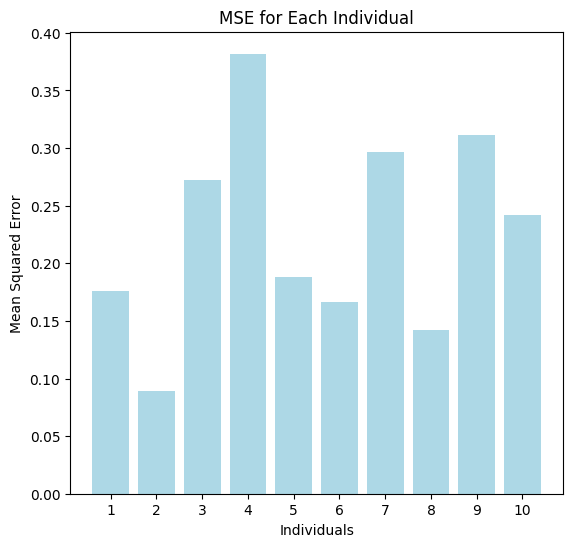

In [7]:
# Calculate population level predicted dX/dt
population_dX_dt_predicted = np.mean(dX_dt_predicted, axis=0)  # Average across individuals

# Calculate population-level true values
true_population_average = np.mean(individual_dX_dt_ground_truth, axis=0)

# Calculate population MSE and standard deviation
population_mse = calculate_mse(true_population_average, population_dX_dt_predicted)
population_std = calculate_std(true_population_average)

# Print population level results
print(f"\nPopulation Level - MSE: {population_mse:.4f}, Std: {population_std:.4f}")

# Optional: Visualize MSE and Std
plt.figure(figsize=(14, 6))

# Subplot for individual MSE
plt.subplot(1, 2, 1)
plt.bar(range(1, n_individuals + 1), mse_values, color='lightblue')
plt.xticks(range(1, n_individuals + 1))
plt.xlabel("Individuals")
plt.ylabel("Mean Squared Error")
plt.title("MSE for Each Individual")


# Excluding latent  variable

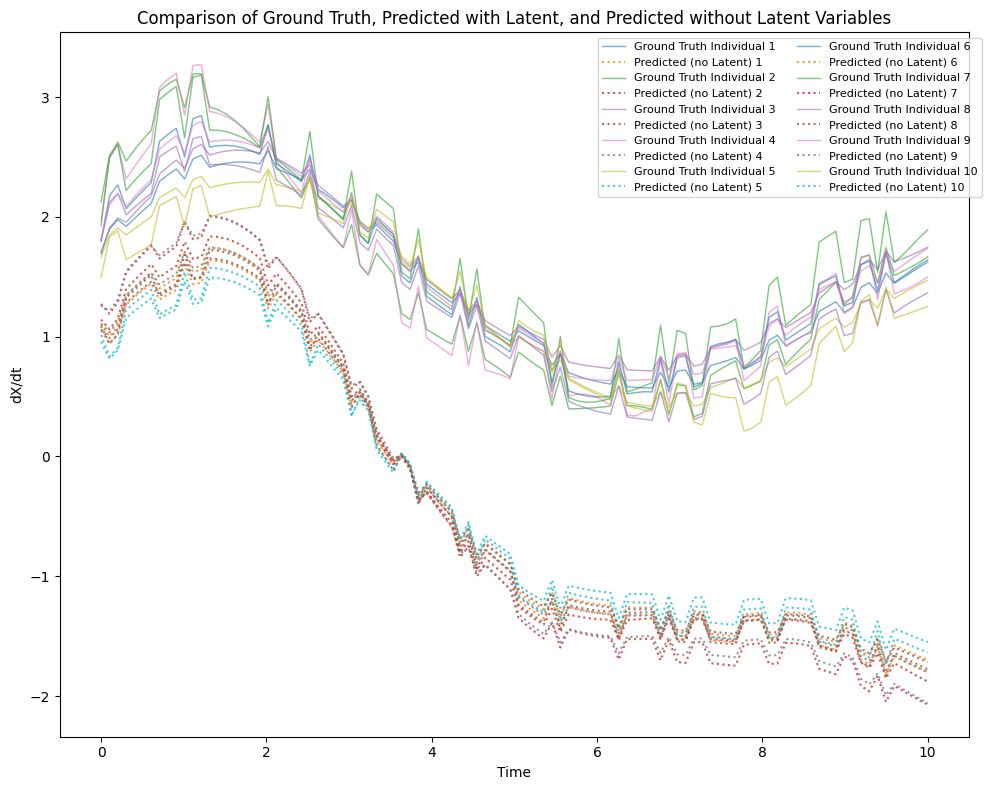

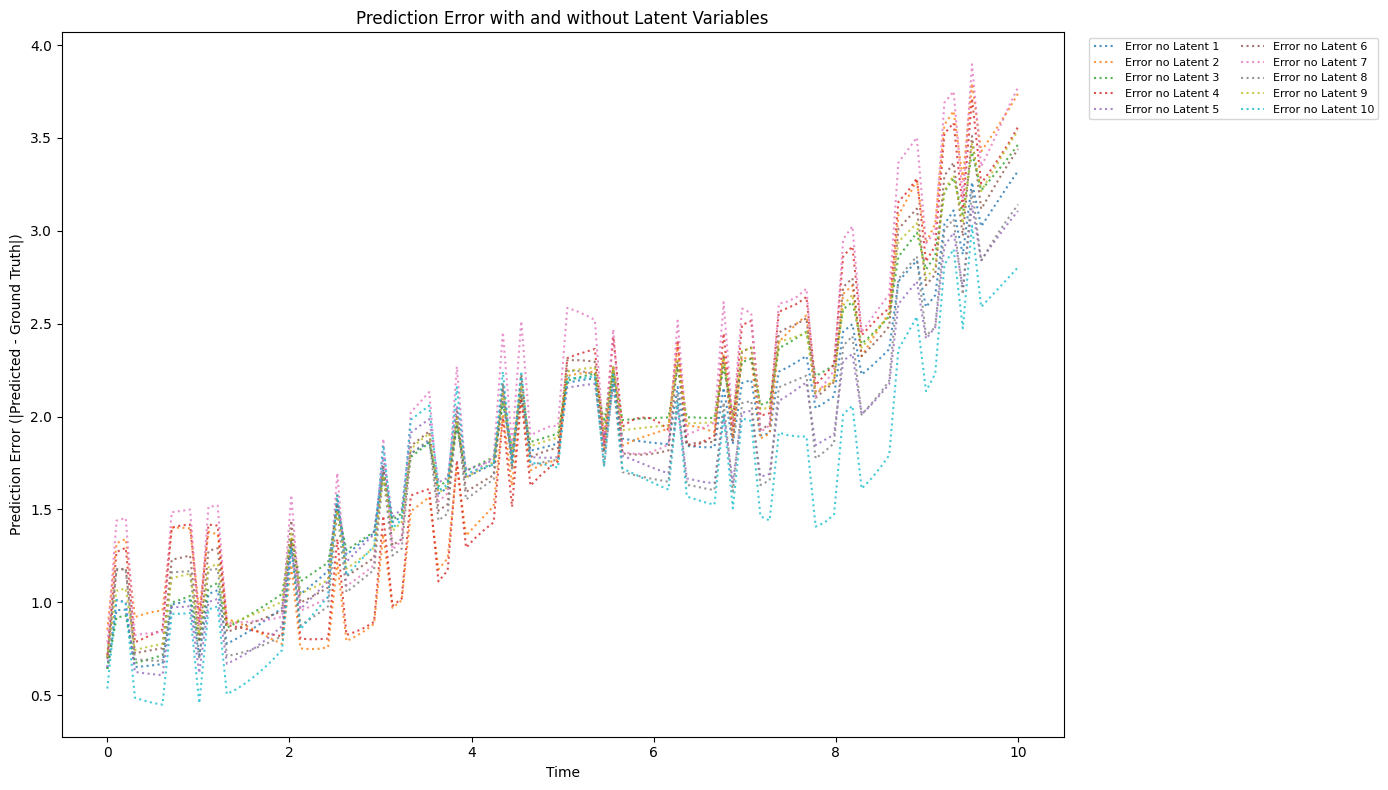

In [16]:
# Function to predict dX/dt without considering latent variables Z
def predict_dX_dt_without_latent(X, A, individual_betas, t):
    """Predict dX/dt for all individuals ignoring latent variables."""
    dX_dt_predictions = []
    for beta_individual in individual_betas:
        dX_dt_i = beta_individual[0] * X * (1 - X / 10) + beta_individual[2] * np.sin(t) + beta_individual[3] * A
        dX_dt_predictions.append(dX_dt_i)
    return np.array(dX_dt_predictions)

# Predict dX/dt for all individuals without considering latent variables
dX_dt_predicted_no_latent = predict_dX_dt_without_latent(X, treatment_effects, individual_betas, t_span)

# Plot the comparison of ground truth and predicted dX/dt (with and without latent variables)
plt.figure(figsize=(14, 8))

for i in range(n_individuals):
    plt.plot(t_span, individual_dX_dt_ground_truth[i], label=f"Ground Truth Individual {i+1}", linewidth=1, alpha=0.6)
    plt.plot(t_span, dX_dt_predicted_no_latent[i], linestyle=":", label=f"Predicted (no Latent) {i+1}", alpha=0.8)

plt.xlabel("Time")
plt.ylabel("dX/dt")
plt.title("Comparison of Ground Truth, Predicted with Latent, and Predicted without Latent Variables")
plt.legend(bbox_to_anchor=(1.02, 1), ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

# Plot the error (absolute difference) for both scenarios
plt.figure(figsize=(14, 8))

for i in range(n_individuals):
    error_without_latent = np.abs(dX_dt_predicted_no_latent[i] - individual_dX_dt_ground_truth[i])
    plt.plot(t_span, error_without_latent, label=f"Error no Latent {i+1}", linestyle=":", alpha=0.8)

plt.xlabel("Time")
plt.ylabel("Prediction Error (|Predicted - Ground Truth|)")
plt.title("Prediction Error with and without Latent Variables")
plt.legend(bbox_to_anchor=(1.02, 1), ncol=2, fontsize=8)
plt.tight_layout()
plt.show()      


In [11]:
# Calculate MSE and standard deviation for each individual without latent variables
mse_values_no_latent = []
std_values_no_latent = []

for i in range(n_individuals):
    mse_no_latent = calculate_mse(individual_dX_dt_ground_truth[i], dX_dt_predicted_no_latent[i])
    std_no_latent = calculate_std(individual_dX_dt_ground_truth[i])  # Example usage of std
    mse_values_no_latent.append(mse_no_latent)
    std_values_no_latent.append(std_no_latent)

# Print the MSE and std for each individual (without latent variables)
for i in range(n_individuals):
    print(f"Individual {i+1} (No Latent) - MSE: {mse_values_no_latent[i]:.4f}, Std: {std_values_no_latent[i]:.4f}")

# Calculate population level predicted dX/dt without considering latent variables
population_dX_dt_predicted_no_latent = np.mean(dX_dt_predicted_no_latent, axis=0)  # Average across individuals

# Calculate population-level true values
true_population_average_no_latent = np.mean(individual_dX_dt_ground_truth, axis=0)

# Calculate population MSE and standard deviation without latent variables
population_mse_no_latent = calculate_mse(true_population_average_no_latent, population_dX_dt_predicted_no_latent)
population_std_no_latent = calculate_std(true_population_average_no_latent)

# Print population metrics (without latent variables)
print(f"Population (No Latent) - MSE: {population_mse_no_latent:.4f}, Std: {population_std_no_latent:.4f}")


Individual 1 (No Latent) - MSE: 4.5566, Std: 0.6997
Individual 2 (No Latent) - MSE: 4.9395, Std: 0.7396
Individual 3 (No Latent) - MSE: 3.4308, Std: 0.7118
Individual 4 (No Latent) - MSE: 3.4106, Std: 0.7767
Individual 5 (No Latent) - MSE: 4.6069, Std: 0.6444
Individual 6 (No Latent) - MSE: 4.4840, Std: 0.7408
Individual 7 (No Latent) - MSE: 3.7752, Std: 0.6140
Individual 8 (No Latent) - MSE: 4.4232, Std: 0.6364
Individual 9 (No Latent) - MSE: 4.0667, Std: 0.8048
Individual 10 (No Latent) - MSE: 3.6147, Std: 0.6991
Population (No Latent) - MSE: 4.0913, Std: 0.6915


## Populational-level Inference

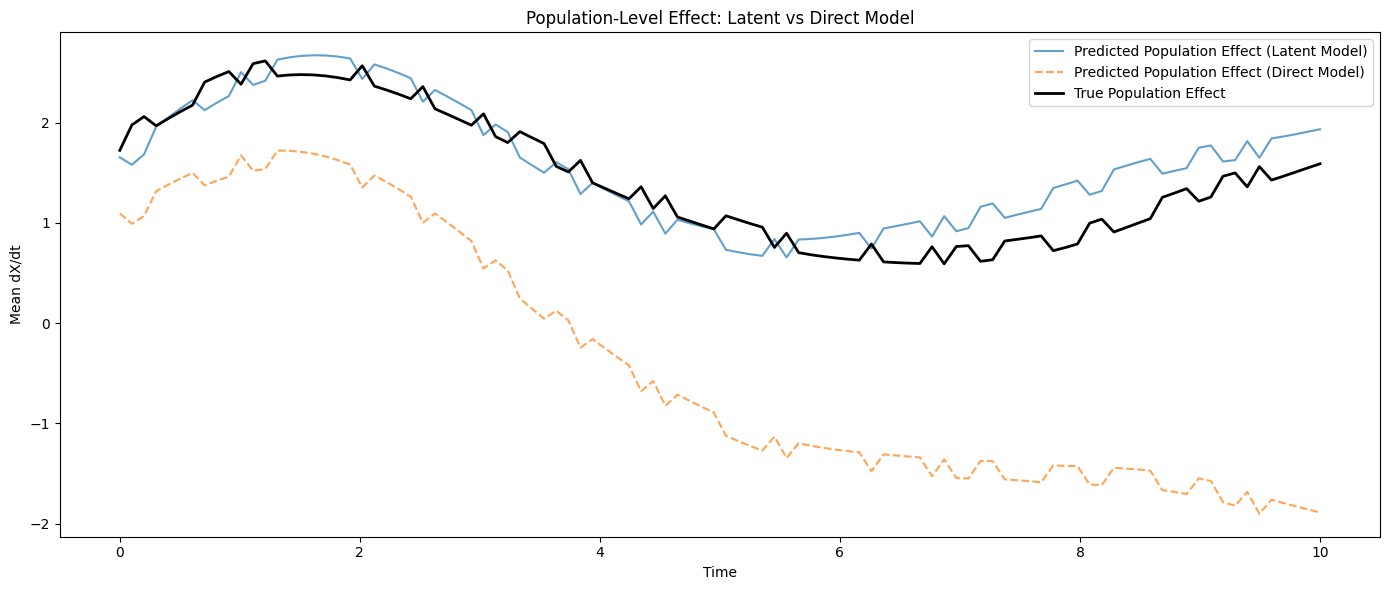

In [9]:
# Function to predict dX/dt using direct model (no latent variables)
def predict_dX_dt_direct(X, A, individual_betas, t):
    """Predict dX/dt for all individuals ignoring latent variables."""
    dX_dt_predictions = []
    for beta_individual in individual_betas:
        dX_dt_i = beta_individual[0] * X * (1 - X / 10) + beta_individual[2] * np.sin(t) + beta_individual[3] * A
        dX_dt_predictions.append(dX_dt_i)
    return np.array(dX_dt_predictions)

# Predict dX/dt for all individuals using the direct model (no latent variables)
dX_dt_predicted_direct = predict_dX_dt_direct(X, treatment_effects, individual_betas, t_span)

# Compare population-level effects by averaging dX/dt across all individuals
dX_dt_predicted_with_latent = np.mean(dX_dt_predicted, axis=0)
dX_dt_predicted_no_latent = np.mean(dX_dt_predicted_direct, axis=0)
dX_dt_ground_truth = np.mean(individual_dX_dt_ground_truth, axis=0)

# Plot: Latent model vs. Direct model for population-level dynamics
plt.figure(figsize=(14, 6))


# Second subplot: Population-level effect
plt.plot(t_span, dX_dt_predicted_with_latent, label='Predicted Population Effect (Latent Model)', alpha=0.7)
plt.plot(t_span, dX_dt_predicted_no_latent, linestyle='--', label='Predicted Population Effect (Direct Model)', alpha=0.7)
plt.plot(t_span, dX_dt_ground_truth, label='True Population Effect', color='black', linewidth=2)
plt.title("Population-Level Effect: Latent vs Direct Model")
plt.xlabel("Time")
plt.ylabel("Mean dX/dt")
plt.legend()

plt.tight_layout()
plt.show()


## RNN-ODE Based

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.linear_model import Lasso

# Example: RNN-ODE Encoder-Decoder Framework
class RNN_ODE:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

    def encoder(self, X, U, A):
        # Simulated RNN encoder for initial latent state z(t0)
        z_t0 = np.mean(X) + np.mean(U) + np.mean(A)  # Simplified
        return z_t0

    def latent_ode(self, t, Z, theta):
        # Example latent dynamics: dZ/dt = -theta * Z
        return -theta * Z

    def decoder(self, z_t0, t_span, theta):
        # Solve latent ODE using z(t0)
        sol = solve_ivp(self.latent_ode, [t_span[0], t_span[-1]], [z_t0], args=(theta,), t_eval=t_span)
        return sol.y[0]

# Generate synthetic data (same as before)
t_span, X, Z, U, A, gamma, beta = generate_synthetic_data()

# Initialize RNN-ODE
rnn_ode = RNN_ODE(input_dim=3, hidden_dim=10, output_dim=1)

# Estimate z(t0) and Z(t)
z_t0_est = rnn_ode.encoder(X, U, A)
Z_est = rnn_ode.decoder(z_t0_est, t_span, theta=0.5)

# Compare true and estimated Z
print("True Z(t):", Z[:5])
print("Estimated Z(t):", Z_est[:5])

# SINDy for population ODE
dX_dt = np.gradient(X, t_span)
feature_library = build_feature_library(X, Z_est, U, A)
beta_est = fit_population_dynamics(t_span, dX_dt, feature_library)

# Fine-tuning individual dynamics
beta_individual = fine_tune_individual_dynamics(X, dX_dt, feature_library, beta_est)
print(f"Population beta: {beta_est}")
print(f"Individual beta: {beta_individual}")


TypeError: generate_synthetic_data() missing 1 required positional argument: 'probabilities'